In [9]:
import matplotlib.pyplot as plt
import cv2

import numpy as np # linear algebra
import pandas as pd 

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape
import tensorflow as tf

In [10]:
images_gray = np.load('image-colorization/l/gray_scale.npy')
images_lab = np.load('image-colorization/ab/ab/ab1.npy')

In [24]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

imgs_for_input = pipe_line_img(images_gray, batch_size = 300)

In [25]:
#define the function
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)

    #print(imgs_.shape)
    
    return imgs_
    
#preprocess the input to 
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = images_gray, ab_imgs = images_lab, n = 300))

In [26]:
model_simple = Sequential()

model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True,
                        bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True,
                        bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True,
                                 bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, 
                                 bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

#Compile the model
model_simple.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss = tf.compat.v1.losses.mean_pairwise_squared_error)

In [27]:
imgs_for_s = np.zeros((300, 224, 224, 1))
imgs_for_s[:, :, :, 0] = images_gray[:300] 

In [28]:
model_simple.fit(imgs_for_input, imgs_for_output, epochs = 5, batch_size = 16)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 22s 74ms/sample - loss: 6.9195
Epoch 2/5
300/300 [==============================] - 18s 61ms/sample - loss: 5.5090
Epoch 3/5
300/300 [==============================] - 19s 63ms/sample - loss: 2.5464
Epoch 4/5
300/300 [==============================] - 18s 61ms/sample - loss: 2.0200
Epoch 5/5
300/300 [==============================] - 18s 59ms/sample - loss: 1.8770


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


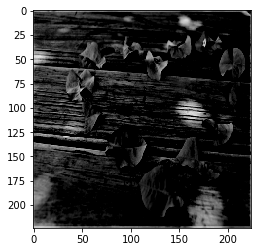

In [36]:
plt.imshow(imgs_for_input[1])

In [37]:
prediction = model_simple.predict(imgs_for_input)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


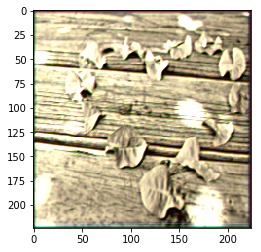

In [38]:
#display the predicted image
plt.imshow(prediction[1])